In [10]:
import os,sys
from keras.models import Sequential
from keras.layers import Dense
#from keras.utils import np_utils #one hot encoding
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
#packages for cnn
from keras import backend as K
#K.set_image_dim_ordering('tf') # execute tensorflow as backend
#from keras.layers.convolutional import Conv2D
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
#from keras.layers.convolutional import MaxPooling2D
#to avoid overfitting include dropout
from keras.layers import Dropout
#to flatten maxpool layer o/p
from keras.layers import Flatten
from IPython.display import display
from PIL import Image
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline

In [11]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
#Affected cases folder: https://drive.google.com/drive/folders/1mQvsjK8aZ8p4TiP8WnAeobr9v_srBIek?usp=share_link
#Uninfected cases folder:https://drive.google.com/drive/folders/1JwUV37lbBxg50XGk5JHFGWHm2V28yKU3?usp=share_link

In [14]:
path1 = "/content/drive/MyDrive/malaria dataset/affected"
path2 = "/content/drive/MyDrive/malaria dataset/uninfected"
path3 = "/content/drive/MyDrive/malaria dataset/affected_processed"
path4 = "/content/drive/MyDrive/malaria dataset/uninfected_processed"
files = os.listdir(path1)
num_samples = len(files) # len for 1d ; 2d shape
num_samples

150

In [15]:
im = plt.imread(path3+'/'+files[4])
im.shape

(150, 150, 3)

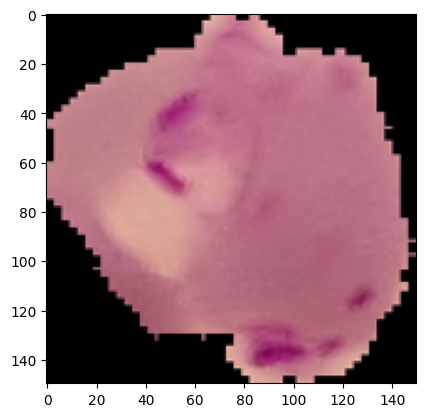

In [16]:
plt.imshow(im)

In [17]:
rows = 150
cols = 150

In [18]:
for file in files:
    im = Image.open(path1+'/'+file)   #'\\' in spyder IDE
    img = im.resize((cols,rows))
    #gray = img.convert('L') #converts rgb to gray
    img.save(path3+'/'+file,'PNG')

In [19]:
files3 = os.listdir(path3) # stores the file name alone
len(files3)

150

In [20]:
files = os.listdir(path2)

In [21]:
len(files)

350

In [22]:
for file in files:
    im = Image.open(path2+'/'+file)   #'\\' in spyder IDE
    img = im.resize((cols,rows))
    #gray = img.convert('L') #converts rgb to gray
    img.save(path4+'/'+file,'PNG')

In [23]:
files4 = os.listdir(path4) # stores the file name alone
len(files4)

350

In [24]:
import cv2
from google.colab.patches import cv2_imshow

In [25]:
#rows = 100
#cols = 100
#create numpy array for all images as 150 x (150 x 150 X 3 = 67500)
dat = np.array([np.array(Image.open('/content/drive/MyDrive/malaria dataset/affected_processed'+'/'+file)).flatten() for file in files3],'f')
dat.shape


(150, 67500)

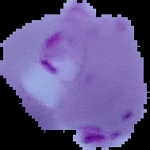

In [26]:
test1=dat[8,:].reshape(rows,cols,3) #for color (rows,cols,3)
cv2_imshow(test1)

In [27]:
test1.shape

(150, 150, 3)

In [28]:
dat.shape

(150, 67500)

In [29]:
dat2 = np.array([np.array(Image.open('/content/drive/MyDrive/malaria dataset/uninfected_processed'+'/'+file)).flatten() for file in files4],'f')
dat2.shape


(350, 67500)

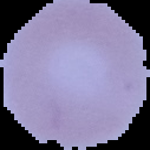

In [30]:
test1=dat2[20,:].reshape(rows,cols,3) #for color (rows,cols,3)
cv2_imshow(test1)

In [31]:
dat2.shape

(350, 67500)

In [32]:
dat_complete=np.concatenate((dat,dat2),axis=0)
dat_complete.shape

(500, 67500)

In [33]:
num_samples=dat_complete.shape[0]

In [34]:
#initialize all labels as 0
label = np.zeros((num_samples,),dtype=int)
label[:90]=1 # affected cases (malaria)
label[90:]=0  # uninfected cases
label

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [35]:
.70*175

122.49999999999999

In [36]:
data,Label = shuffle(dat_complete,label,random_state=2)

In [37]:
Label

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,

In [65]:
data,Label = shuffle(dat_complete,label,random_state=2)
xtrain,xtest,ytrain,ytest = train_test_split(data,Label,test_size=.2,random_state=42)
#flattened data needs to be reshape to image format for passing to convolution network
# we need to pass the no of samples and the image dimension
x_train = xtrain.reshape(xtrain.shape[0],rows,cols,3)#,3 for color
x_test = xtest.reshape(xtest.shape[0],rows,cols,3)#,3 for color
#conver to float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#data needs to be normalized from 0 to 255 to 0 to 1
x_train = x_train/255
x_test = x_test/255
ytest

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [66]:
xtrain.shape,xtest.shape

((400, 67500), (100, 67500))

In [67]:
x_train.shape

(400, 150, 150, 3)

In [68]:
x_test.shape

(100, 150, 150, 3)

In [69]:
ytrain

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [70]:
ytest

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [71]:
#o/p is integer needs to be encoded as binary - one hot encoding
y_train = to_categorical(ytrain)
y_test = to_categorical(ytest)
num_classes = y_train.shape[1]  # 2 objects
num_classes

2

In [72]:
y_train[0]

array([1., 0.], dtype=float32)

In [73]:
y_train[2]

array([1., 0.], dtype=float32)

In [74]:
# create model - 2CNN 1 MAXPOOL,
model = Sequential()
#CNN LAYER - no of filers = 32, mask = (5,5),i/p shape = image dimension 220,450,1; single channgel padding is reqd - same
model.add(Conv2D(64,(3,3),input_shape=(rows,cols,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))  #o/p returns the features of the images
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten()) # acts as the i/p layer to dense which is 1st hidden layer
model.add(Dropout(0.2))
#dense layer  - always give no of neurons = 512, no of filters etc as pwoer of 2
#kernel initializer = normal means -> normally distributed weights (default is uniform)
model.add(Dense(518,activation='relu'))
model.add(Dropout(0.2))
#model.add(Dense(120,activation='relu'))
#model.add(Dense(100,activation='relu'))
model.add(Dense(num_classes, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
#fit the model
#just to show 2 lines in console while model is fitting


In [75]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=8,verbose=2)

Epoch 1/100
50/50 - 3s - loss: 0.5058 - accuracy: 0.8025 - val_loss: 0.4361 - val_accuracy: 0.8400 - 3s/epoch - 52ms/step
Epoch 2/100
50/50 - 1s - loss: 0.4832 - accuracy: 0.8150 - val_loss: 0.4556 - val_accuracy: 0.8400 - 1s/epoch - 20ms/step
Epoch 3/100
50/50 - 1s - loss: 0.4714 - accuracy: 0.8150 - val_loss: 0.4384 - val_accuracy: 0.8400 - 1s/epoch - 20ms/step
Epoch 4/100
50/50 - 1s - loss: 0.4777 - accuracy: 0.8150 - val_loss: 0.4253 - val_accuracy: 0.8400 - 1s/epoch - 20ms/step
Epoch 5/100
50/50 - 1s - loss: 0.4674 - accuracy: 0.8150 - val_loss: 0.4210 - val_accuracy: 0.8400 - 1s/epoch - 21ms/step
Epoch 6/100
50/50 - 1s - loss: 0.4689 - accuracy: 0.8150 - val_loss: 0.4401 - val_accuracy: 0.8400 - 1s/epoch - 21ms/step
Epoch 7/100
50/50 - 1s - loss: 0.4621 - accuracy: 0.8150 - val_loss: 0.4149 - val_accuracy: 0.8400 - 1s/epoch - 21ms/step
Epoch 8/100
50/50 - 1s - loss: 0.4618 - accuracy: 0.8150 - val_loss: 0.4306 - val_accuracy: 0.8400 - 1s/epoch - 23ms/step
Epoch 9/100
50/50 - 1s -

In [76]:
acc = model.evaluate(x_test,y_test)
print(acc)

4/4 [==============================] - 0s 14ms/step - loss: 0.4973 - accuracy: 0.8500
[0.4973163604736328, 0.8500000238418579]


In [77]:
x_test[0:3,:,:,:].shape

(3, 150, 150, 3)

In [78]:
 model.predict(x_test[0:3,:,:,:])

1/1 [==============================] - 0s 159ms/step


array([[9.9999821e-01, 2.5199195e-06],
       [1.0000000e+00, 7.8185236e-11],
       [9.9995923e-01, 3.9962077e-05]], dtype=float32)

In [79]:
y_predict = model.predict(x_test)
y_pred = []
for val in y_predict:
    y_pred.append(np.argmax(val))
print(y_pred)
cr = metrics.classification_report(ytest,y_pred)
print(cr)
#convert 0 1 to 1 and 1 0 as 0
cm = metrics.confusion_matrix(ytest,y_pred)
print(cm)

4/4 [==============================] - 0s 15ms/step
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91        84
           1       0.53      0.56      0.55        16

    accuracy                           0.85       100
   macro avg       0.72      0.73      0.73       100
weighted avg       0.85      0.85      0.85       100

[[76  8]
 [ 7  9]]
